In [1]:
import pandas as pd
import numpy as np
import math
import time
import json
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression

In [2]:
#Sleep as Android data
data = pd.read_csv('keshav_sleepdata.csv',error_bad_lines = False)

In [3]:
data.shape

(9, 252)

In [4]:
df = pd.DataFrame(data)

In [5]:
#collecting data from sleep as android
#store readings as list of lists (each list contains data for a day)
readings = []
state = []
for row in df.itertuples():
    if(row[3][0] != 'F'):
        start_day = row[3]
        start_time = start_day[-5:]
        start = start_time.split(':')
        start_hr = int(start[0])
        start_min = int(start[1])
        print(start_hr,start_min)
        
        end_day = row[4]
        end_time = end_day[-5:]
        end = end_time.split(':')
        end_hr = int(end[0])
        end_min = int(end[1])
        print(end_hr,end_min)
    
        #To calculate no. of windows  
        cycles = 0    
        if(start_hr < 12):
            cycles = (end_hr - start_hr)*12;
        else:
            cycles = (24 - start_hr + end_hr)*12;

        diff = end_min - start_min
        cycles += math.floor(diff/5)
        #row[16] is the start of the readings.
        val=[]
        for i in range(16,16+cycles):
            val.append(float(row[i]))
        situ = []
        for l in range(cycles):
            situ.append('sleep')
        
        #For each day
        for j in range(17+cycles,len(row)):
            if not(pd.isnull(row[j])):
#initially we assigned every state as sleep and and then checked in the events for awake and updated the windows
                if(row[j][0] == 'A' and row[j][1] == 'W'): #or row[j][0] == 'T' or row[j][0] == 'B'
                    event = row[j].split('_')[1].split('-')[0]
                    tim = time.strftime("%H:%M", time.localtime(float(row[j].split('_')[1].split('-')[1])/1000))
                    if(event == 'START'):
                        awake_start_hr = int(tim.split(':')[0])
                        awake_start_min = int(tim.split(':')[1])
                        
                        window_start = 0    
                        if((start_hr < 12 and awake_start_hr < 12) or (start_hr > 12 and awake_start_hr > 12) ):
                            window_start = (awake_start_hr - start_hr)*12

                        else:
                            window_start = (24 - start_hr + awake_start_hr)*12 
                                           
                        dif = awake_start_min - start_min
                        window_start += math.floor(dif/5)

                    if(event == 'END'):
                        awake_end_hr = int(tim.split(':')[0])
                        awake_end_min = int(tim.split(':')[1])
                        

                        
                        window_end = 0    
                        if((awake_start_hr < 12 and awake_end_hr < 12) or (awake_start_hr > 12 and awake_end_hr > 12) ):
                            window_end = (awake_end_hr - awake_start_hr)*12 
                        else:
                            window_end = (24 - awake_start_hr + awake_end_hr)*12 
                        
                        change = awake_end_min - awake_start_min
                        window_end += math.floor(change/5) + window_start
                        
                        for i in range(window_start,window_end):
                            situ[i] = 'awake'
                
                        
                    
        readings.append(val)            
        state.append(situ)      

            
        
    else:
        continue

print(state)
#print(readings)
#If we're gonna use HMM to model sleep we can't have infinite possibilities of observations.so we'll map readings to high or low
pred = []
for i in range(len(readings)):
    sta = []
    for j in range(len(readings[i])):
        if(readings[i][j]<9.8):#(This 9.6 needs to be changed by doing a data analysis)
            sta.append(0)
        else:
            sta.append(1)
    pred.append(sta)        
print(pred)
for i in range(len(state)):
    print(len(state[i]),len(readings[i]),len(pred[i]))   

for i in range(len(readings)):
    readings[i] = np.asarray(readings[i])

1 43
10 3
2 49
9 48
6 52
10 3
3 2
10 29
2 18
9 59
[['sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'awake', 'sleep', 'sleep', 'sleep', 'awake', 'awake', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'awake', 'awake', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep'], ['sleep', 'sleep', 'sleep', 'sleep', 'sleep', '

In [6]:
re = []
ti = []
#dat = json.loads(open('june19-20.json').read())
dat = json.loads(open('keshav2-3.json').read())
#d = dat['user-7d526de8-f12f-4d28-8bb7-c8d2807beb7e']['data']
d = dat['data']
#print(a)
for di in d:
    re.append(d[di]['sensorValue'])
    ti.append(d[di]['timestamp'])
for j in range(len(re)):
        print(time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(int(ti[j])/1000)) , re[j])
re = [float(i) for i in re] # string to float
ti = [float(i) for i in ti]
re = (np.asarray(re))#required for np.mean(b)
ti = np.asarray(ti)# required for np.where near(8'O clock)  

2019-06-12 16:42:43 9.823446243589407
2019-06-12 16:43:01 9.812430860402053
2019-06-12 16:43:09 9.786306858425265
2019-06-12 16:43:17 9.79644102380338
2019-06-12 16:43:26 9.793399120520414
2019-06-12 16:43:34 9.810352808760463
2019-06-12 16:43:46 9.80337588920344
2019-06-12 16:43:51 9.811254683019376
2019-06-12 16:43:59 9.795586531423146
2019-06-12 16:44:07 9.801486977551203
2019-06-12 16:44:16 9.786427485446712
2019-06-12 16:44:24 9.781464751584164
2019-06-12 16:44:32 9.785505506330875
2019-06-12 16:44:40 9.798429495474545
2019-06-12 16:44:48 9.781453761421767
2019-06-12 16:44:56 9.787391694182425
2019-06-12 16:45:05 9.792431282084161
2019-06-12 16:45:13 9.785429321921411
2019-06-12 16:45:21 9.797498693752983
2019-06-12 16:45:29 9.792403862892174
2019-06-12 16:45:37 9.787422345834742
2019-06-12 16:45:45 9.791670856978465
2019-06-12 16:45:54 9.780473852393115
2019-06-12 16:46:02 9.793401009500966
2019-06-12 16:46:10 9.7845188314487
2019-06-12 16:46:18 9.79533947830001
2019-06-12 16:46:

2019-06-12 20:04:10 9.768958825631154
2019-06-12 20:04:22 9.767470806339677
2019-06-12 20:04:34 9.77580444697416
2019-06-12 20:04:42 9.765083683312032
2019-06-12 20:04:54 9.769745191401453
2019-06-12 20:05:06 9.764511551569615
2019-06-12 20:05:17 9.76310266924413
2019-06-12 20:05:29 9.771377810627907
2019-06-12 20:05:41 9.761929852850459
2019-06-12 20:05:52 9.765770764482061
2019-06-12 20:06:03 9.764058243243
2019-06-12 20:06:15 9.760942000461341
2019-06-12 20:06:26 9.759013110722632
2019-06-12 20:06:37 9.763328559526805
2019-06-12 20:06:49 9.758622899788886
2019-06-12 20:07:00 9.759267528123896
2019-06-12 20:07:12 9.758471212300753
2019-06-12 20:07:23 9.771843075971782
2019-06-12 20:07:31 9.617636382930716
2019-06-12 20:07:39 9.759707753075682
2019-06-12 20:07:50 9.75362332485082
2019-06-12 20:08:01 9.766002127934465
2019-06-12 20:08:13 9.768585536270866
2019-06-12 20:08:28 9.773317299658421
2019-06-12 20:08:39 9.766600501018406
2019-06-12 20:08:53 9.758509604815451
2019-06-12 20:09:0

2019-06-13 00:32:34 9.779529592035582
2019-06-13 00:33:10 9.782733723343322
2019-06-13 00:33:18 9.625573780142625
2019-06-13 00:33:26 9.672681896513811
2019-06-13 00:33:35 9.784628576142339
2019-06-13 00:33:57 9.782457319990897
2019-06-13 00:34:07 9.783975169318266
2019-06-13 00:34:16 9.771020804553102
2019-06-13 00:34:29 9.777487815594917
2019-06-13 00:34:43 9.774757536848165
2019-06-13 00:34:55 9.788943219204459
2019-06-13 00:35:04 9.781008743038383
2019-06-13 00:35:12 9.78335321410128
2019-06-13 00:35:20 9.784495969919552
2019-06-13 00:35:29 9.786311999075204
2019-06-13 00:35:51 9.778305419405674
2019-06-13 00:36:00 9.774840403406962
2019-06-13 00:36:09 9.788638840328227
2019-06-13 00:36:19 9.774766693096991
2019-06-13 00:36:27 9.79650305005071
2019-06-13 00:36:35 9.789780719284106
2019-06-13 00:36:55 9.780713831148189
2019-06-13 00:37:04 9.780076233568588
2019-06-13 00:37:24 9.761948473437869
2019-06-13 00:37:32 9.687511333041645
2019-06-13 00:37:56 9.372016941646665
2019-06-13 00:

2019-06-13 08:44:14 9.797701842428678
2019-06-13 08:44:45 9.794183125738567
2019-06-13 08:45:00 9.776527461685523
2019-06-13 08:45:08 9.777654838654179
2019-06-13 08:45:19 9.777523719412773
2019-06-13 08:46:01 9.775837213834912
2019-06-13 08:46:34 9.784435296064752
2019-06-13 08:46:42 9.772705889783733
2019-06-13 08:46:52 9.781542101564458
2019-06-13 08:47:00 9.77801600317149
2019-06-13 08:47:08 9.775077004887462
2019-06-13 08:47:20 9.779931189243449
2019-06-13 08:47:28 9.77348584582769
2019-06-13 08:47:39 9.776559975428272
2019-06-13 08:47:47 9.784260688398229
2019-06-13 08:47:55 9.83303146887802
2019-06-13 08:48:02 9.786140104788656
2019-06-13 08:48:10 9.783838035811451
2019-06-13 08:48:18 9.777204014133499
2019-06-13 08:48:46 9.781135146200453
2019-06-13 08:49:05 9.774424036249782
2019-06-13 08:49:13 9.784079157026833
2019-06-13 08:49:23 9.786482365164636
2019-06-13 08:49:32 9.784107417661103
2019-06-13 08:49:40 9.781569689380984
2019-06-13 08:49:48 9.779317244308874
2019-06-13 08:5

2019-06-13 13:13:49 9.787472256690405
2019-06-13 13:13:57 9.80335365196704
2019-06-13 13:14:05 9.790431515130596
2019-06-13 13:14:13 9.792569244802989
2019-06-13 13:14:22 9.78736640653634
2019-06-13 13:14:30 9.790537740760135
2019-06-13 13:14:38 9.78940265472191
2019-06-13 13:14:46 9.79254397051605
2019-06-13 13:14:54 9.793450021996126
2019-06-13 13:15:02 9.789445200663016
2019-06-13 13:15:10 9.792549689123147
2019-06-13 13:15:19 9.790481461785488
2019-06-13 13:15:27 9.801343936994153
2019-06-13 13:15:35 9.78140279747478
2019-06-13 13:15:43 9.792421784926885
2019-06-13 13:15:51 9.792591506534569
2019-06-13 13:15:59 9.793478969917608
2019-06-13 13:16:08 9.797559780621532
2019-06-13 13:16:16 9.790492799297779
2019-06-13 13:16:24 9.797380907898797
2019-06-13 13:16:32 9.788572508418545
2019-06-13 13:16:53 9.814488858100942
2019-06-13 13:17:18 9.826352334318592
2019-06-13 13:17:27 9.793417244952293
2019-06-13 13:18:01 9.821368741056457
2019-06-13 13:18:09 9.802408117245593
2019-06-13 13:18:

2019-06-13 16:39:08 9.802915377419575
2019-06-13 16:39:16 9.786803202687327
2019-06-13 16:39:24 9.78687595345875
2019-06-13 16:39:32 9.802790158788474
2019-06-13 16:39:40 9.77978898143113
2019-06-13 16:39:48 9.80179896607214
2019-06-13 16:39:56 9.77277576300193
2019-06-13 16:40:04 9.804930599218443
2019-06-13 16:40:12 9.801672712914677
2019-06-13 16:40:20 9.783252110141383
2019-06-13 16:40:28 9.786934807547626
2019-06-13 16:40:36 9.790031528863647
2019-06-13 16:40:44 9.785846514969517
2019-06-13 16:40:52 9.802808877978613
2019-06-13 16:41:00 9.802637139942204
2019-06-13 16:41:08 9.79771895162679
2019-06-13 16:41:16 9.811685811058661
2019-06-13 16:41:24 9.792802275883577
2019-06-13 16:41:32 9.802728135486424
2019-06-13 16:41:40 9.802927006661692
2019-06-13 16:41:48 9.807536752059134
2019-06-13 16:41:56 9.796428774408568
2019-06-13 16:42:04 9.805424824306739
2019-06-13 16:42:12 9.791887365089577
2019-06-13 16:42:20 9.802928995884269
2019-06-13 16:42:28 9.786990238463009
2019-06-13 16:42:

2019-06-13 20:28:56 9.73416135131155
2019-06-13 20:29:04 9.746485827241699
2019-06-13 20:29:13 9.736908661362131
2019-06-13 20:29:23 9.74938418863058
2019-06-13 20:29:31 9.728034757447933
2019-06-13 20:29:39 9.741595144102387
2019-06-13 20:29:47 9.739315262435687
2019-06-13 20:29:55 9.733096329201556
2019-06-13 20:30:04 9.748167339998094
2019-06-13 20:30:12 9.741116817641327
2019-06-13 20:30:24 9.73974600653118
2019-06-13 20:30:35 9.756070167460049
2019-06-13 20:30:44 9.749676847724523
2019-06-13 20:30:56 9.74230698285056
2019-06-13 20:31:07 9.715919545971484
2019-06-13 20:31:16 9.73546776252622
2019-06-13 20:31:28 9.761693844875921
2019-06-13 20:31:39 9.756627261510902
2019-06-13 20:31:52 9.740673058782152
2019-06-13 20:32:00 13.186593546621369
2019-06-13 20:32:08 5.154063296359314
2019-06-13 20:32:16 10.502379282874376
2019-06-13 20:32:25 9.474405222252477
2019-06-13 20:32:33 9.972678539517268
2019-06-13 20:32:41 9.803168382844278
2019-06-13 20:32:51 11.704025170438177
2019-06-13 20:

2019-06-14 00:03:08 9.792234928950649
2019-06-14 00:03:16 9.790425165885281
2019-06-14 00:03:24 9.803768014578106
2019-06-14 00:03:32 9.801949468830713
2019-06-14 00:03:40 9.815130462146758
2019-06-14 00:03:48 9.80030791020853
2019-06-14 00:03:56 9.778728955597915
2019-06-14 00:04:04 9.800492967737503
2019-06-14 00:04:12 9.78515345791892
2019-06-14 00:04:20 9.79132850653679
2019-06-14 00:04:28 9.802241650412922
2019-06-14 00:04:36 9.813014254108628
2019-06-14 00:04:44 9.782008092963869
2019-06-14 00:04:52 9.802218281746622
2019-06-14 00:05:00 9.814805245766193
2019-06-14 00:05:08 9.825104567545763
2019-06-14 00:05:16 9.817830065082811
2019-06-14 00:05:24 9.784608180336026
2019-06-14 00:05:32 9.804207133462203
2019-06-14 00:05:40 9.791266037778506
2019-06-14 00:05:48 9.793606995707437
2019-06-14 00:05:56 9.818806505787137
2019-06-14 00:06:04 9.808675740527134
2019-06-14 00:06:12 9.805847316558394
2019-06-14 00:06:20 9.796943254593657
2019-06-14 00:06:28 9.789664946842745
2019-06-14 00:0

2019-06-14 10:31:48 10.819833874739825
2019-06-14 10:32:08 10.459396253731065
2019-06-14 10:32:19 7.168183644316846
2019-06-14 10:32:27 16.28586695423777
2019-06-14 10:32:36 5.655686233604172
2019-06-14 10:32:45 3.580444948835411
2019-06-14 10:32:53 11.841089888073414
2019-06-14 10:33:01 9.658798129667607
2019-06-14 10:33:10 9.596871410005647
2019-06-14 10:33:18 9.341238038262974
2019-06-14 10:33:33 12.446891813993947
2019-06-14 10:33:44 5.2288265724805765
2019-06-14 10:33:52 9.253855718670986
2019-06-14 10:34:00 7.810756098907232
2019-06-14 10:34:08 11.96420193308894
2019-06-14 10:34:16 7.278510244229047
2019-06-14 10:34:30 10.2591163297519
2019-06-14 10:34:42 2.490634069082484
2019-06-14 10:34:53 12.285810701587492
2019-06-14 10:35:04 14.306253163149025
2019-06-14 10:35:12 5.397029693770587
2019-06-14 10:35:20 5.305597565556531
2019-06-14 10:35:28 9.594908383730683
2019-06-14 10:35:37 11.093703533244906
2019-06-14 10:35:50 7.826445808711904
2019-06-14 10:35:59 10.146365696795643
2019

2019-06-14 13:44:30 9.849930729534881
2019-06-14 13:44:38 9.64210117582544
2019-06-14 13:44:46 9.542000101958598
2019-06-14 13:44:54 9.579337539470982
2019-06-14 13:45:02 9.703340094742428
2019-06-14 13:45:10 10.092650018410398
2019-06-14 13:45:18 9.997803711076488
2019-06-14 13:45:26 10.041701183675299
2019-06-14 13:45:34 9.919208414966361
2019-06-14 13:45:42 9.614940150201612
2019-06-14 13:45:50 9.96792553604481
2019-06-14 13:45:58 10.032499904029194
2019-06-14 13:46:06 9.85789841791528
2019-06-14 13:47:13 13.215383612013119
2019-06-14 13:47:21 9.751440265250956
2019-06-14 13:47:29 9.743264337368162
2019-06-14 13:47:37 9.747903162426235
2019-06-14 13:47:45 9.735507768880721
2019-06-14 13:47:53 9.759245986135179
2019-06-14 13:48:01 9.739961220547363
2019-06-14 13:48:09 9.753906966863928
2019-06-14 13:48:17 9.765515618565946
2019-06-14 13:48:25 9.737899827458874
2019-06-14 13:48:33 9.736513322206363
2019-06-14 13:48:41 9.72906394545249
2019-06-14 13:48:49 9.727414302092557
2019-06-14 1

2019-06-14 19:27:03 9.786445133682466
2019-06-14 19:27:12 9.86659537787746
2019-06-14 19:27:27 9.832289020348535
2019-06-14 19:27:39 9.750664252183906
2019-06-14 19:27:48 9.790153455541164
2019-06-14 19:27:56 9.774528191857103
2019-06-14 19:28:07 9.7996838240822
2019-06-14 19:28:15 9.912980451944694
2019-06-14 19:28:33 9.805601963248753
2019-06-14 19:28:42 9.80980025654615
2019-06-14 19:28:50 9.80584318060441
2019-06-14 19:29:04 9.791001274303225
2019-06-14 19:29:12 9.751446583403819
2019-06-14 19:29:21 9.74686033817462
2019-06-14 19:29:32 9.75246768659957
2019-06-14 19:29:43 9.74451181829931
2019-06-14 19:29:51 9.75478266354123
2019-06-14 19:30:07 9.748643222074358
2019-06-14 19:30:17 9.757898224475154
2019-06-14 19:30:26 9.739767621245376
2019-06-14 19:30:38 9.747587090625643
2019-06-14 19:30:49 9.739049907496131
2019-06-14 19:30:58 9.753833656425325
2019-06-14 19:31:12 9.751166002124938
2019-06-14 19:31:22 9.750963117168453
2019-06-14 19:31:33 9.7445949377804
2019-06-14 19:31:45 9.7

2019-06-14 22:30:10 9.80170640213751
2019-06-14 22:30:18 9.795522084704329
2019-06-14 22:30:26 9.800030468771972
2019-06-14 22:30:34 9.79713320949501
2019-06-14 22:30:42 9.80763695348402
2019-06-14 22:30:50 9.787807506495188
2019-06-14 22:30:58 9.789605436288939
2019-06-14 22:31:06 9.796451088367757
2019-06-14 22:31:14 9.788823357065242
2019-06-14 22:31:22 9.8103076761691
2019-06-14 22:31:30 9.85473359095065
2019-06-14 22:31:38 9.805194872071864
2019-06-14 22:31:46 9.800091441502001
2019-06-14 22:31:54 9.798881521583276
2019-06-14 22:32:02 9.789272748118506
2019-06-14 22:32:10 9.806837138187275
2019-06-14 22:32:18 9.792972318177203
2019-06-14 22:32:26 9.801250748078404
2019-06-14 22:32:34 9.779424686732503
2019-06-14 22:32:42 9.805202113033475
2019-06-14 22:32:50 9.797744386598708
2019-06-14 22:32:58 9.803551878410104
2019-06-14 22:33:06 9.80398411210443
2019-06-14 22:33:14 9.799172786180325
2019-06-14 22:33:22 9.802537294410854
2019-06-14 22:33:30 9.79241246699283
2019-06-14 22:33:38 

2019-06-15 01:19:25 9.777978027921328
2019-06-15 01:19:33 9.793747118101347
2019-06-15 01:19:41 9.788345545705324
2019-06-15 01:19:49 9.76451819741308
2019-06-15 01:19:57 9.782218938169738
2019-06-15 01:20:05 9.790868950977933
2019-06-15 01:20:13 9.798768760465524
2019-06-15 01:20:21 9.797719853608589
2019-06-15 01:20:29 9.90975843923243
2019-06-15 01:20:37 9.793144541693596
2019-06-15 01:20:45 9.822459843943355
2019-06-15 01:20:53 9.780266375982205
2019-06-15 01:21:01 9.787271058012546
2019-06-15 01:21:09 9.789568015345058
2019-06-15 01:21:17 9.777864870568788
2019-06-15 01:21:25 9.790610602087986
2019-06-15 01:21:33 9.776454206879265
2019-06-15 01:21:41 9.780076789677954
2019-06-15 01:21:49 9.813155957682044
2019-06-15 01:21:57 9.77591812473286
2019-06-15 01:22:05 9.773323016261836
2019-06-15 01:22:13 9.792564115653454
2019-06-15 01:22:21 9.812045969273129
2019-06-15 01:22:29 9.79758987549074
2019-06-15 01:22:37 9.822154936477775
2019-06-15 01:22:45 9.790967167961178
2019-06-15 01:22

2019-06-15 04:16:50 9.798071425370997
2019-06-15 04:16:58 9.804304300984928
2019-06-15 04:17:06 9.784137460655423
2019-06-15 04:17:14 9.78479886162973
2019-06-15 04:17:22 9.796041878936789
2019-06-15 04:17:30 9.784095964862749
2019-06-15 04:17:38 9.773005019667792
2019-06-15 04:17:46 9.797139517771877
2019-06-15 04:17:54 9.781223020545134
2019-06-15 04:18:02 9.757092421175294
2019-06-15 04:18:10 9.78022129208977
2019-06-15 04:18:18 9.788123424670069
2019-06-15 04:18:26 9.786011190084025
2019-06-15 04:18:34 9.797073580034917
2019-06-15 04:18:42 9.786782818087929
2019-06-15 04:18:50 9.78077705383263
2019-06-15 04:18:58 9.786820368596135
2019-06-15 04:19:06 9.774335648850395
2019-06-15 04:19:14 9.790116053370172
2019-06-15 04:19:22 9.790063244841207
2019-06-15 04:19:30 9.785290683651853
2019-06-15 04:19:38 9.788187532693659
2019-06-15 04:19:46 9.78494577204557
2019-06-15 04:19:54 9.780939616248345
2019-06-15 04:20:02 9.77812064536283
2019-06-15 04:20:10 9.793022281899313
2019-06-15 04:20:

2019-06-15 07:12:31 9.768534083683441
2019-06-15 07:12:39 9.775600367387424
2019-06-15 07:12:47 9.780323909640549
2019-06-15 07:12:55 9.779400366121127
2019-06-15 07:13:03 9.784269250342728
2019-06-15 07:13:11 9.786387429854157
2019-06-15 07:13:19 9.787501222259051
2019-06-15 07:13:27 9.786392283531603
2019-06-15 07:13:35 9.780332038158317
2019-06-15 07:13:43 9.796318529586449
2019-06-15 07:13:51 9.784556901723539
2019-06-15 07:13:59 9.786409092609595
2019-06-15 07:14:07 9.774438259107034
2019-06-15 07:14:15 9.789404595628664
2019-06-15 07:14:23 9.778398366435686
2019-06-15 07:14:31 9.777398547375363
2019-06-15 07:14:39 9.78941409570996
2019-06-15 07:14:47 9.786405414038338
2019-06-15 07:14:55 9.77937296151643
2019-06-15 07:15:03 9.796286680829185
2019-06-15 07:15:11 9.779473990002947
2019-06-15 07:15:19 9.797428879806038
2019-06-15 07:15:27 9.76837029107028
2019-06-15 07:15:35 9.774606911831299
2019-06-15 07:15:43 9.793509245074063
2019-06-15 07:15:51 9.799316395218318
2019-06-15 07:1

2019-06-15 11:58:08 9.826617819166078
2019-06-15 11:58:16 9.780154725357953
2019-06-15 11:58:24 9.806832003197131
2019-06-15 11:58:32 9.8132858040493
2019-06-15 11:58:40 9.829818268752927
2019-06-15 11:58:48 9.844357319601995
2019-06-15 11:58:56 9.83215713169312
2019-06-15 11:59:04 9.815367829154752
2019-06-15 11:59:12 9.798103315937485
2019-06-15 11:59:20 9.809822542168583
2019-06-15 11:59:28 9.829546949887725
2019-06-15 11:59:36 9.83132221700463
2019-06-15 11:59:44 9.80767445104987
2019-06-15 11:59:52 9.827435449245863
2019-06-15 12:00:00 9.806145878890513
2019-06-15 12:01:26 9.726963317653297
2019-06-15 12:06:59 9.633542337836625
2019-06-15 12:07:59 9.675574275342468
2019-06-15 12:13:47 9.699405600546568
2019-06-15 12:13:55 9.68300056897727
2019-06-15 12:14:03 8.768074545047476
2019-06-15 12:14:11 9.800035230573375
2019-06-15 12:14:19 9.800254755261342
2019-06-15 12:14:27 9.78524193605028
2019-06-15 12:14:35 9.85298510127726
2019-06-15 12:14:43 9.798546085914335
2019-06-15 12:14:51 

2019-06-28 20:59:12 9.80421680411884
2019-06-28 20:59:18 9.810143912750261
2019-06-28 20:59:24 9.811143183372772
2019-06-28 20:59:30 9.836253400697318
2019-06-28 20:59:36 9.821462923142299
2019-06-28 20:59:43 9.819385465475863
2019-06-28 20:59:49 9.814748374695622
2019-06-28 20:59:55 9.811170284957148
2019-06-28 21:00:01 9.802319929375363
2019-06-28 21:00:07 9.809483032665273
2019-06-28 21:00:13 9.812100413376028
2019-06-28 21:00:19 9.808681871643357
2019-06-28 21:00:26 9.816633068074799
2019-06-28 21:00:32 9.817557162899636
2019-06-28 21:00:38 9.81413487732547
2019-06-28 21:00:44 9.818247685790656
2019-06-28 21:00:50 9.804911874605706
2019-06-28 21:00:56 9.82944212194706
2019-06-28 21:01:02 9.823213338345086
2019-06-28 21:01:09 8.18873257936137
2019-06-28 21:01:15 9.678644819221887
2019-06-28 21:01:21 9.68286258531169
2019-06-28 21:01:27 9.713950349305437
2019-06-28 21:01:33 9.647255874748302
2019-06-28 21:01:39 9.646193329600614
2019-06-28 21:01:45 9.692809293119199
2019-06-28 21:01:

2019-06-28 22:49:22 9.795724622342359
2019-06-28 22:49:28 9.813517650084796
2019-06-28 22:49:35 9.812412991601247
2019-06-28 22:49:41 9.81399235270346
2019-06-28 22:49:47 9.807125899004017
2019-06-28 22:49:53 9.79250548816573
2019-06-28 22:49:59 9.806378253438455
2019-06-28 22:50:06 9.813227857701188
2019-06-28 22:50:12 9.831589076986441
2019-06-28 22:50:18 9.807899609639357
2019-06-28 22:50:24 9.804440295532405
2019-06-28 22:50:30 9.799928981844673
2019-06-28 22:50:36 9.79756097043104
2019-06-28 22:50:42 9.803961263103252
2019-06-28 22:50:48 9.803266624322925
2019-06-28 22:50:54 9.801913089987199
2019-06-28 22:51:00 9.793851995925785
2019-06-28 22:51:07 9.812926258218996
2019-06-28 22:51:13 9.804288937589087
2019-06-28 22:51:19 9.808900640519377
2019-06-28 22:51:25 9.825660211476796
2019-06-28 22:51:31 9.804238650517263
2019-06-28 22:51:37 9.809827101102538
2019-06-28 22:51:44 9.806787931103374
2019-06-28 22:51:50 9.801324929223474
2019-06-28 22:51:56 9.801883709598606
2019-06-28 22:5

2019-06-29 02:08:53 9.81996991963451
2019-06-29 02:09:05 10.101960289875958
2019-06-29 02:09:11 9.818653825888306
2019-06-29 02:09:37 9.819347424483974
2019-06-29 02:10:00 9.811351132638169
2019-06-29 02:10:11 9.835751565348774
2019-06-29 02:10:17 9.820438538182795
2019-06-29 02:10:25 9.817644174235433
2019-06-29 02:10:31 9.805943844712049
2019-06-29 02:10:37 7.244738642617286
2019-06-29 02:10:43 9.712301601868766
2019-06-29 02:10:49 9.58876689776982
2019-06-29 02:10:55 9.643892728518667
2019-06-29 02:11:02 10.5858657867654
2019-06-29 02:11:08 9.679441372423753
2019-06-29 02:11:14 9.730493705552053
2019-06-29 02:11:20 8.58306685497723
2019-06-29 02:11:26 9.822999697455279
2019-06-29 02:11:35 9.808819457605058
2019-06-29 02:12:32 9.803013144128874
2019-06-29 02:13:16 9.791675528688168
2019-06-29 02:13:22 9.803742273911933
2019-06-29 02:13:28 9.798696855779681
2019-06-29 02:13:38 9.804803550903136
2019-06-29 02:13:54 9.81599444957608
2019-06-29 02:14:18 9.803718102400865
2019-06-29 02:14

2019-06-29 04:26:19 9.798412595271131
2019-06-29 04:26:25 9.792887589791999
2019-06-29 04:26:31 9.789386539482535
2019-06-29 04:26:37 9.788532466689666
2019-06-29 04:26:43 9.783402410344738
2019-06-29 04:26:49 9.79371162177741
2019-06-29 04:26:55 9.79181817944896
2019-06-29 04:27:01 9.788753893913404
2019-06-29 04:27:07 9.780718001583677
2019-06-29 04:27:13 9.804582763693595
2019-06-29 04:27:19 9.787703565675402
2019-06-29 04:27:25 9.79606253631582
2019-06-29 04:27:31 9.78921942015652
2019-06-29 04:27:37 9.783732344255107
2019-06-29 04:27:43 9.79855547708427
2019-06-29 04:27:49 9.7889905491571
2019-06-29 04:27:55 9.799000175124055
2019-06-29 04:28:01 9.799938295111001
2019-06-29 04:28:07 9.787231055549112
2019-06-29 04:28:13 9.78697992685474
2019-06-29 04:28:19 9.787947079661851
2019-06-29 04:28:25 9.785681977469121
2019-06-29 04:28:31 9.794342961608812
2019-06-29 04:28:37 9.787635565448058
2019-06-29 04:28:43 9.795850609670982
2019-06-29 04:28:49 9.779510045538352
2019-06-29 04:28:55 

2019-06-29 06:34:13 9.800527499177802
2019-06-29 06:34:19 9.806670307348428
2019-06-29 06:34:25 9.79894044499656
2019-06-29 06:34:31 9.803599818075604
2019-06-29 06:34:37 9.787511503375605
2019-06-29 06:34:43 9.812092577368846
2019-06-29 06:34:49 9.797048584988842
2019-06-29 06:34:55 9.803682439167284
2019-06-29 06:35:01 9.795376621150641
2019-06-29 06:35:07 9.79496139998533
2019-06-29 06:35:13 9.809920279522975
2019-06-29 06:35:19 9.794838020640064
2019-06-29 06:35:26 9.808052798536094
2019-06-29 06:35:32 9.811550930854843
2019-06-29 06:35:38 9.809183992076203
2019-06-29 06:35:44 9.802123418537318
2019-06-29 06:35:50 9.797464258463666
2019-06-29 06:35:56 9.801097199990416
2019-06-29 06:36:02 9.802260732173854
2019-06-29 06:36:08 9.806731347566112
2019-06-29 06:36:14 9.790818377519972
2019-06-29 06:36:20 9.80599192081905
2019-06-29 06:36:26 9.793579015305447
2019-06-29 06:36:32 9.797093083211827
2019-06-29 06:36:38 9.802497243030777
2019-06-29 06:36:44 9.812809433533944
2019-06-29 06:3

2019-06-29 08:34:48 9.787472065349643
2019-06-29 08:34:54 9.796254218743785
2019-06-29 08:35:00 9.79584277680767
2019-06-29 08:35:06 9.803549428726956
2019-06-29 08:35:12 9.80267229485747
2019-06-29 08:35:18 9.781942958269944
2019-06-29 08:35:24 9.797601793956693
2019-06-29 08:35:30 9.796561947161596
2019-06-29 08:35:36 9.797475536054211
2019-06-29 08:35:43 9.800234488718624
2019-06-29 08:35:49 9.810128225833076
2019-06-29 08:35:55 9.792671069034732
2019-06-29 08:36:01 9.796334261008576
2019-06-29 08:36:07 9.774716900250715
2019-06-29 08:36:13 9.80169868851664
2019-06-29 08:36:19 9.795099574095476
2019-06-29 08:36:25 9.796859750662989
2019-06-29 08:36:31 9.797194752066249
2019-06-29 08:36:37 9.790030010527788
2019-06-29 08:36:43 9.801394654261749
2019-06-29 08:36:49 9.792846910819998
2019-06-29 08:36:55 9.807656772199568
2019-06-29 08:37:01 9.796630540283486
2019-06-29 08:37:07 9.780736579693897
2019-06-29 08:37:13 9.788915290093843
2019-06-29 08:37:19 9.81123018254914
2019-06-29 08:37

2019-06-29 20:47:47 9.811311957833366
2019-06-29 20:47:53 9.806122821803154
2019-06-29 20:47:59 9.807968338338888
2019-06-29 20:48:05 9.807774824091059
2019-06-29 20:48:11 9.803090771323882
2019-06-29 20:48:18 9.918383433191678
2019-06-29 20:48:24 9.819670777226825
2019-06-29 20:48:30 9.966301133507823
2019-06-29 20:48:36 9.823510011763789
2019-06-29 20:48:42 9.77719850135375
2019-06-29 20:48:48 9.626658235535466
2019-06-29 20:48:55 7.917704921841731
2019-06-29 20:49:01 8.927365585960025
2019-06-29 20:49:07 9.663101422999235
2019-06-29 20:49:13 8.945579153828744
2019-06-29 20:49:19 9.131282853085157
2019-06-29 20:49:25 10.398293010705812
2019-06-29 20:49:31 10.538324115612278
2019-06-29 20:49:37 10.760378924103644
2019-06-29 20:49:44 8.081216443213519
2019-06-29 20:49:50 10.086617618312978
2019-06-29 20:49:56 10.024419437936952
2019-06-29 20:50:02 5.607061086999016
2019-06-29 20:50:08 11.573953041200745
2019-06-29 20:50:15 14.544640260473342
2019-06-29 20:50:21 9.800903058062563
2019-0

2019-06-29 22:47:24 9.835668305750616
2019-06-29 22:47:30 9.794619276259215
2019-06-29 22:47:36 9.77356381726216
2019-06-29 22:47:42 11.951952433233904
2019-06-29 22:47:48 10.262729180454206
2019-06-29 22:47:54 9.749658497239473
2019-06-29 22:48:00 9.858991564753381
2019-06-29 22:48:07 9.83160660230207
2019-06-29 22:48:13 9.825139960990661
2019-06-29 22:48:19 9.807981874563348
2019-06-29 22:48:25 9.833036515903313
2019-06-29 22:48:31 9.8272227837101
2019-06-29 22:48:37 9.947797228609389
2019-06-29 22:48:43 9.821504625080678
2019-06-29 22:48:50 9.759482514010736
2019-06-29 22:48:56 9.829966152232483
2019-06-29 22:49:02 9.876468040840479
2019-06-29 22:49:08 9.800589499035148
2019-06-29 22:49:14 9.906039387682833
2019-06-29 22:49:20 9.784951761502446
2019-06-29 22:49:26 9.724497472844236
2019-06-29 22:49:32 9.81615727683984
2019-06-29 22:49:38 9.824812978646474
2019-06-29 22:49:44 9.823231752062728
2019-06-29 22:49:51 9.8149974876748
2019-06-29 22:49:57 9.817959970716736
2019-06-29 22:50:

2019-06-30 01:31:51 9.75463802133627
2019-06-30 01:31:57 9.780540021892458
2019-06-30 01:32:03 9.770070999215838
2019-06-30 01:32:09 9.780680617533601
2019-06-30 01:32:15 9.442856541884783
2019-06-30 01:32:21 9.769282544081038
2019-06-30 01:32:27 9.692946266003341
2019-06-30 01:32:33 9.761690894962017
2019-06-30 01:32:39 9.64909696358047
2019-06-30 01:32:45 9.757272258179073
2019-06-30 01:32:51 9.822057269749095
2019-06-30 01:32:57 9.833544325432907
2019-06-30 01:33:03 9.632875787192944
2019-06-30 01:33:09 9.72926570625801
2019-06-30 01:33:15 9.656145798233903
2019-06-30 01:33:21 9.639198457383861
2019-06-30 01:33:27 9.82848707274193
2019-06-30 01:33:33 9.684429638347972
2019-06-30 01:33:39 10.191147944831025
2019-06-30 01:33:45 9.792375884371049
2019-06-30 01:33:51 9.436695499746966
2019-06-30 01:33:57 9.606141796261635
2019-06-30 01:34:03 9.728109577010416
2019-06-30 01:34:09 9.548830762084727
2019-06-30 01:34:15 10.675623683492933
2019-06-30 01:34:21 9.707781084502539
2019-06-30 01:

2019-06-30 04:19:56 9.81191570704613
2019-06-30 04:20:02 9.7958871122396
2019-06-30 04:20:08 9.801052340643292
2019-06-30 04:20:14 9.80545706139366
2019-06-30 04:20:20 9.807740464279556
2019-06-30 04:20:26 9.813678093338137
2019-06-30 04:20:32 9.807805784065511
2019-06-30 04:20:38 9.811169029790234
2019-06-30 04:20:44 9.815326456693631
2019-06-30 04:20:50 9.806150974045169
2019-06-30 04:20:57 9.81015166199865
2019-06-30 04:21:03 9.805660256144296
2019-06-30 04:21:09 9.805228414009973
2019-06-30 04:21:15 9.798264517638684
2019-06-30 04:21:21 9.81405510548906
2019-06-30 04:21:27 9.811066308620624
2019-06-30 04:21:33 9.794898929829149
2019-06-30 04:21:39 9.814984038113375
2019-06-30 04:21:45 9.812099589266118
2019-06-30 04:21:51 9.809892458126779
2019-06-30 04:21:57 9.802227396246955
2019-06-30 04:22:03 9.803057790306632
2019-06-30 04:22:09 9.803206136682466
2019-06-30 04:22:15 9.802158840150073
2019-06-30 04:22:21 9.808340277582316
2019-06-30 04:22:27 9.802992789298893
2019-06-30 04:22:3

2019-06-30 06:12:18 9.799029412232077
2019-06-30 06:12:24 9.803916050446698
2019-06-30 06:12:30 9.801745752986509
2019-06-30 06:12:36 9.801232050859468
2019-06-30 06:12:42 9.816789367488186
2019-06-30 06:12:48 9.800343392697647
2019-06-30 06:12:54 9.797689540570117
2019-06-30 06:13:00 9.798577526609652
2019-06-30 06:13:06 9.811294936693445
2019-06-30 06:13:12 9.799000029549887
2019-06-30 06:13:18 9.8063470925516
2019-06-30 06:13:24 9.802871438688994
2019-06-30 06:13:30 9.801407987414287
2019-06-30 06:13:36 9.801362063714215
2019-06-30 06:13:42 9.803959793406278
2019-06-30 06:13:48 9.8193673408367
2019-06-30 06:13:54 9.808036324823341
2019-06-30 06:14:00 9.802879860772217
2019-06-30 06:14:06 9.8173717567796
2019-06-30 06:14:13 9.80768415878759
2019-06-30 06:14:19 9.802227614245696
2019-06-30 06:14:25 9.805322337486398
2019-06-30 06:14:31 9.803641843354614
2019-06-30 06:14:37 9.808946139932676
2019-06-30 06:14:43 9.807297453118
2019-06-30 06:14:49 9.808123971591623
2019-06-30 06:14:55 9.

2019-06-30 07:58:39 9.810239321804074
2019-06-30 07:58:45 9.799430042852627
2019-06-30 07:58:51 9.80704033473405
2019-06-30 07:58:57 9.802281585012237
2019-06-30 07:59:03 9.801127997555547
2019-06-30 07:59:09 9.801189067173434
2019-06-30 07:59:15 9.793975010669001
2019-06-30 07:59:21 9.799151797633241
2019-06-30 07:59:27 9.7972112467883
2019-06-30 07:59:33 9.791290900800206
2019-06-30 07:59:39 9.794098365238051
2019-06-30 07:59:45 9.801983285571115
2019-06-30 07:59:51 9.797163047716666
2019-06-30 07:59:57 9.801489839518938
2019-06-30 08:00:03 9.808162189753356
2019-06-30 08:00:09 9.801613920595724
2019-06-30 08:00:15 9.81011832760435
2019-06-30 08:00:21 9.803898313085991
2019-06-30 08:00:27 9.803856340071729
2019-06-30 08:00:33 9.803705533785985
2019-06-30 08:00:39 9.800463774855446
2019-06-30 08:00:45 9.802976593729893
2019-06-30 08:00:51 9.809485682367706
2019-06-30 08:00:57 9.794452655912275
2019-06-30 08:01:03 9.799120820074476
2019-06-30 08:01:09 9.799661589612343
2019-06-30 08:01

2019-06-30 09:43:29 9.798590828968099
2019-06-30 09:43:35 9.796003269995385
2019-06-30 09:43:41 9.80098231269731
2019-06-30 09:43:47 9.796204557780554
2019-06-30 09:43:53 9.813150150364793
2019-06-30 09:43:59 9.800744567811682
2019-06-30 09:44:05 9.806209930327267
2019-06-30 09:44:11 9.797551637612633
2019-06-30 09:44:17 9.80520536048634
2019-06-30 09:44:23 9.807724021901173
2019-06-30 09:44:29 9.797800205541316
2019-06-30 09:44:35 9.802247809072778
2019-06-30 09:44:41 9.790791981371173
2019-06-30 09:44:47 9.808614454930975
2019-06-30 09:44:53 9.810564494487183
2019-06-30 09:44:59 9.810059406515707
2019-06-30 09:45:05 9.813563051053743
2019-06-30 09:45:11 9.808559409188096
2019-06-30 09:45:17 9.810852544099266
2019-06-30 09:45:23 9.804392700755939
2019-06-30 09:45:29 9.806871126465602
2019-06-30 09:45:35 9.798853169693848
2019-06-30 09:45:41 9.793897936034886
2019-06-30 09:45:47 9.795034619496464
2019-06-30 09:45:54 9.82068038644999
2019-06-30 09:46:00 9.792901710278803
2019-06-30 09:4

2019-06-30 22:04:09 9.61262924773038
2019-06-30 22:04:15 9.66552431701969
2019-06-30 22:04:21 9.707684842120129
2019-06-30 22:04:27 9.710692283548221
2019-06-30 22:04:34 9.872822385953667
2019-06-30 22:04:40 9.611388962151167
2019-06-30 22:04:46 9.6475518304384
2019-06-30 22:04:52 9.671557388576666
2019-06-30 22:04:58 9.395217860990437
2019-06-30 22:05:04 9.38406349121321
2019-06-30 22:05:10 10.276654585503849
2019-06-30 22:05:16 9.653312217219284
2019-06-30 22:05:22 9.61177609197794
2019-06-30 22:05:28 9.65072531400299
2019-06-30 22:05:35 10.490671402175826
2019-06-30 22:05:41 9.646578616455084
2019-06-30 22:05:47 9.636591828734042
2019-06-30 22:05:53 9.693460781432268
2019-06-30 22:05:59 9.658933961064742
2019-06-30 22:06:05 9.608470157255974
2019-06-30 22:06:11 9.615811596179949
2019-06-30 22:06:17 9.693508317093697
2019-06-30 22:06:24 10.013687880037835
2019-06-30 22:06:30 9.77552594116451
2019-06-30 22:06:36 9.608060300996717
2019-06-30 22:06:42 9.531036335320046
2019-06-30 22:06:

2019-07-01 00:16:43 11.097298218743088
2019-07-01 00:16:49 9.467681703662496
2019-07-01 00:16:55 9.321167067947183
2019-07-01 00:17:01 9.668399395145013
2019-07-01 00:17:07 9.866532187495814
2019-07-01 00:17:13 9.547431116681606
2019-07-01 00:17:19 11.304492712527626
2019-07-01 00:17:25 9.490924182910563
2019-07-01 00:17:31 9.470411769820688
2019-07-01 00:17:37 9.565832453265367
2019-07-01 00:17:43 9.637892809573392
2019-07-01 00:17:49 8.849873679417326
2019-07-01 00:17:55 9.7598982354147
2019-07-01 00:18:01 9.664969040847627
2019-07-01 00:18:07 9.649054192597315
2019-07-01 00:18:13 9.656610898104558
2019-07-01 00:18:19 9.687001983518332
2019-07-01 00:18:26 9.43408319812986
2019-07-01 00:18:32 9.280025858906985
2019-07-01 00:18:38 9.742331758188733
2019-07-01 00:18:44 9.742138165029658
2019-07-01 00:18:50 10.084246384422531
2019-07-01 00:18:56 9.571218193487793
2019-07-01 00:19:02 10.015345390378323
2019-07-01 00:19:08 9.723556677271153
2019-07-01 00:19:14 9.671302427632025
2019-07-01 

2019-07-01 02:42:46 9.804285802814004
2019-07-01 02:42:52 9.80924615310606
2019-07-01 02:42:58 9.798928398514306
2019-07-01 02:43:04 9.803343446849984
2019-07-01 02:43:10 9.802948680705027
2019-07-01 02:43:16 9.803743989828206
2019-07-01 02:43:23 9.800080742713675
2019-07-01 02:43:29 9.806086877852422
2019-07-01 02:43:35 9.822811874642744
2019-07-01 02:43:41 9.812330734261257
2019-07-01 02:43:47 9.815361319415095
2019-07-01 02:43:53 9.801512926829764
2019-07-01 02:44:00 9.803813753213914
2019-07-01 02:44:06 9.808959736648843
2019-07-01 02:44:12 9.794165469910421
2019-07-01 02:44:18 9.800002739230475
2019-07-01 02:44:24 9.801966211153516
2019-07-01 02:44:30 9.808420680125925
2019-07-01 02:44:36 9.803924106533257
2019-07-01 02:44:43 9.811218646879423
2019-07-01 02:44:49 9.794302125799335
2019-07-01 02:44:55 9.811760901704071
2019-07-01 02:45:01 9.799413833584428
2019-07-01 02:45:07 9.792894062589442
2019-07-01 02:45:13 9.796077485941918
2019-07-01 02:45:20 9.813611123289192
2019-07-01 02

2019-07-01 04:58:25 9.814691231252503
2019-07-01 04:58:31 9.819462633103067
2019-07-01 04:58:37 9.799545440096193
2019-07-01 04:58:43 9.80145716078283
2019-07-01 04:58:49 9.80868327608454
2019-07-01 04:58:55 9.810499296573774
2019-07-01 04:59:02 9.80706559559281
2019-07-01 04:59:08 9.80442631123196
2019-07-01 04:59:14 9.798023306166774
2019-07-01 04:59:20 9.809307411643012
2019-07-01 04:59:26 9.81134936742058
2019-07-01 04:59:32 9.819880560041259
2019-07-01 04:59:38 9.819067675769302
2019-07-01 04:59:44 9.810682741309881
2019-07-01 04:59:51 9.810355932218338
2019-07-01 04:59:57 9.806819854488126
2019-07-01 05:00:03 9.808405002857446
2019-07-01 05:00:09 9.807463422508501
2019-07-01 05:00:15 9.8074263536688
2019-07-01 05:00:21 9.8102819860636
2019-07-01 05:00:27 9.810499362564283
2019-07-01 05:00:34 9.804991140225626
2019-07-01 05:00:40 9.80715063654619
2019-07-01 05:00:46 9.80268593276606
2019-07-01 05:00:52 9.795325320141652
2019-07-01 05:00:58 9.804002775710144
2019-07-01 05:01:04 9.7

2019-07-01 07:03:32 9.785679986988482
2019-07-01 07:03:38 9.781354619757176
2019-07-01 07:03:44 9.772962878892997
2019-07-01 07:03:50 9.777062352866755
2019-07-01 07:03:56 9.778596484101062
2019-07-01 07:04:02 9.774416922649861
2019-07-01 07:04:08 9.788893342783176
2019-07-01 07:04:14 9.78533101135927
2019-07-01 07:04:20 9.780744633918012
2019-07-01 07:04:26 9.778551654276844
2019-07-01 07:04:32 9.770929571561716
2019-07-01 07:04:38 9.770981216990515
2019-07-01 07:04:44 9.77765251833343
2019-07-01 07:04:50 9.779674961204075
2019-07-01 07:04:56 9.786013264851826
2019-07-01 07:05:02 9.78729097259284
2019-07-01 07:05:08 9.781191206150405
2019-07-01 07:05:14 9.780308933232616
2019-07-01 07:05:21 9.773042150423032
2019-07-01 07:05:27 9.780267569241934
2019-07-01 07:05:33 9.78119229212908
2019-07-01 07:05:39 9.782738186009773
2019-07-01 07:05:45 9.789041582089082
2019-07-01 07:05:51 9.78097961815463
2019-07-01 07:05:57 9.791741110743194
2019-07-01 07:06:03 9.788351756464232
2019-07-01 07:06:

2019-07-01 09:09:14 9.781253842592166
2019-07-01 09:09:20 9.776974353132529
2019-07-01 09:09:26 9.786020687554442
2019-07-01 09:09:33 9.776162768465872
2019-07-01 09:09:39 9.779602424845464
2019-07-01 09:09:45 9.77052250782435
2019-07-01 09:09:51 9.770782176622324
2019-07-01 09:09:57 9.773977451750024
2019-07-01 09:10:03 9.775435458483232
2019-07-01 09:10:09 9.771361369438477
2019-07-01 09:10:15 9.766528589715946
2019-07-01 09:10:21 9.769953224377739
2019-07-01 09:10:27 9.768271939813674
2019-07-01 09:10:33 9.773294978792698
2019-07-01 09:10:39 9.775598999103494
2019-07-01 09:10:45 9.770906282714487
2019-07-01 09:10:51 9.768914560691963
2019-07-01 09:10:57 9.76534476665164
2019-07-01 09:11:03 9.784688713435303
2019-07-01 09:11:09 9.781123405515064
2019-07-01 09:11:15 9.77315948691812
2019-07-01 09:11:21 9.782466185815048
2019-07-01 09:11:27 9.784890843700772
2019-07-01 09:11:33 9.776989416718184
2019-07-01 09:11:39 9.77386285102494
2019-07-01 09:11:45 9.777507356356052
2019-07-01 09:11

2019-07-01 21:38:15 15.528096646510404
2019-07-01 21:38:21 17.192830013650926
2019-07-01 21:38:27 9.515256276995537
2019-07-01 21:38:34 9.828953234472735
2019-07-01 21:38:40 8.725845376015915
2019-07-01 21:38:48 9.792747580288747
2019-07-01 21:38:54 9.803496615937604
2019-07-01 21:39:05 9.80862050155886
2019-07-01 21:39:11 9.831504640698581
2019-07-01 21:39:23 9.816115563882146
2019-07-01 21:39:31 9.78913690457725
2019-07-01 21:39:43 9.804157590295125
2019-07-01 21:39:56 9.797240665335202
2019-07-01 21:40:06 9.796810640869628
2019-07-01 21:40:12 9.836575964468345
2019-07-01 21:40:24 9.802374707069323
2019-07-01 21:40:35 9.82142851150216
2019-07-01 21:40:41 9.804282434496878
2019-07-01 21:40:48 9.818638696619397
2019-07-01 21:41:00 9.817728333963421
2019-07-01 21:41:12 9.796384370386283
2019-07-01 21:41:19 9.799100459395483
2019-07-01 21:41:30 9.865526873122011
2019-07-01 21:41:44 9.805943656072158
2019-07-01 21:41:50 9.776976643281893
2019-07-01 21:41:59 9.802289730940581
2019-07-01 21

2019-07-02 00:19:48 9.449465946559425
2019-07-02 00:19:54 9.712458877656703
2019-07-02 00:20:00 9.811889871173257
2019-07-02 00:20:07 9.96688544699034
2019-07-02 00:20:13 11.579031086506568
2019-07-02 00:20:19 11.034372242223357
2019-07-02 00:20:25 9.85229017007788
2019-07-02 00:20:32 9.714453882676384
2019-07-02 00:20:38 9.772921370557668
2019-07-02 00:20:44 9.808624204763225
2019-07-02 00:20:52 9.662680252200488
2019-07-02 00:21:00 9.797038967174226
2019-07-02 00:21:06 9.864375052422467
2019-07-02 00:21:12 9.806344820147556
2019-07-02 00:21:19 9.901438264991237
2019-07-02 00:21:28 9.85197116777442
2019-07-02 00:21:34 9.849601431784015
2019-07-02 00:21:42 9.848436512201872
2019-07-02 00:21:49 9.17204547776815
2019-07-02 00:21:58 9.788910654806061
2019-07-02 00:22:04 9.628335435394904
2019-07-02 00:22:13 9.848388221613805
2019-07-02 00:22:20 9.818105861050897
2019-07-02 00:22:26 9.800784961158893
2019-07-02 00:22:36 9.774407078539326
2019-07-02 00:22:43 9.773696153552722
2019-07-02 00:

2019-07-02 03:41:14 9.82237888329357
2019-07-02 03:41:20 9.810485322197152
2019-07-02 03:41:26 9.814462000183335
2019-07-02 03:41:32 9.817998441859919
2019-07-02 03:41:38 9.820115383855294
2019-07-02 03:41:44 9.814514469020043
2019-07-02 03:41:50 9.8248607771635
2019-07-02 03:41:56 9.813645612565324
2019-07-02 03:42:02 9.821615973152555
2019-07-02 03:42:08 9.834286810770383
2019-07-02 03:42:14 9.81359908843835
2019-07-02 03:42:20 9.819859643192496
2019-07-02 03:42:27 9.817390151617307
2019-07-02 03:42:33 9.808159614788075
2019-07-02 03:42:39 9.822551715807798
2019-07-02 03:42:45 9.812873274546426
2019-07-02 03:42:51 9.821407810166525
2019-07-02 03:42:57 9.81201718061905
2019-07-02 03:43:03 9.822373414038573
2019-07-02 03:43:09 9.821351239554476
2019-07-02 03:43:15 9.80859607539952
2019-07-02 03:43:21 9.809101313011503
2019-07-02 03:43:27 9.808802956320447
2019-07-02 03:43:33 9.812979868062156
2019-07-02 03:43:39 9.823045235186408
2019-07-02 03:43:45 9.822666207213548
2019-07-02 03:43:5

2019-07-02 05:56:22 9.823838497479453
2019-07-02 05:56:28 9.829639875571612
2019-07-02 05:56:34 9.822013122164117
2019-07-02 05:56:40 9.836681550829645
2019-07-02 05:56:46 9.823106109006432
2019-07-02 05:56:52 9.81624297925266
2019-07-02 05:56:58 9.820269973867665
2019-07-02 05:57:04 9.83173501358251
2019-07-02 05:57:10 9.823316536224745
2019-07-02 05:57:16 9.816366361618202
2019-07-02 05:57:22 9.829353354691431
2019-07-02 05:57:28 9.826645311123833
2019-07-02 05:57:34 9.817853695237835
2019-07-02 05:57:40 9.83005430607547
2019-07-02 05:57:46 9.826070986430958
2019-07-02 05:57:52 9.841621409117199
2019-07-02 05:57:58 9.82944809946951
2019-07-02 05:58:04 9.822736975221886
2019-07-02 05:58:10 9.818655585050761
2019-07-02 05:58:16 9.818057099021088
2019-07-02 05:58:22 9.826813595443555
2019-07-02 05:58:28 9.822651032095102
2019-07-02 05:58:34 9.83270080217428
2019-07-02 05:58:40 9.829348211602277
2019-07-02 05:58:46 9.828895692227507
2019-07-02 05:58:52 9.832089834210539
2019-07-02 05:58:

2019-07-02 08:07:17 9.787535317045393
2019-07-02 08:07:23 9.790051411095558
2019-07-02 08:07:29 9.78540818764352
2019-07-02 08:07:35 9.787807389417818
2019-07-02 08:07:41 9.774683062746698
2019-07-02 08:07:47 9.785820015374023
2019-07-02 08:07:53 9.78419810418206
2019-07-02 08:07:59 9.777045353512618
2019-07-02 08:08:05 9.793620831807479
2019-07-02 08:08:11 9.782143342696402
2019-07-02 08:08:17 9.838406090019793
2019-07-02 08:08:23 9.72700327385701
2019-07-02 08:08:29 9.777567467933652
2019-07-02 08:08:35 9.786184717149268
2019-07-02 08:08:41 9.786331598791682
2019-07-02 08:08:47 9.782346899843587
2019-07-02 08:08:53 9.776382643880382
2019-07-02 08:08:59 9.78998770134751
2019-07-02 08:09:05 9.800685377714018
2019-07-02 08:09:11 9.791698862638873
2019-07-02 08:09:17 9.786015941776979
2019-07-02 08:09:23 9.790586101333808
2019-07-02 08:09:29 9.783707126356617
2019-07-02 08:09:35 9.791734799318391
2019-07-02 08:09:41 9.797480687617961
2019-07-02 08:09:47 9.793651046352693
2019-07-02 08:09

2019-07-02 20:01:56 9.52040683109383
2019-07-02 20:02:02 9.769526956202517
2019-07-02 20:02:08 9.512627355376894
2019-07-02 20:02:14 9.683699044586564
2019-07-02 20:02:20 9.607965596698357
2019-07-02 20:02:26 9.67620997674114
2019-07-02 20:02:33 9.615257996157274
2019-07-02 20:02:39 9.586458980597245
2019-07-02 20:02:45 9.800475538013558
2019-07-02 20:02:51 9.650461647410083
2019-07-02 20:02:57 9.624791479785813
2019-07-02 20:03:03 9.357882113268458
2019-07-02 20:03:09 9.613091470101756
2019-07-02 20:03:16 9.520706874774485
2019-07-02 20:03:22 9.639987206889556
2019-07-02 20:03:28 9.73676216122241
2019-07-02 20:03:34 9.43608083291116
2019-07-02 20:03:40 9.800666107135708
2019-07-02 20:03:46 9.472601026150826
2019-07-02 20:03:52 9.576846611180832
2019-07-02 20:03:58 9.335102924145527
2019-07-02 20:04:04 9.705215859389922
2019-07-02 20:04:11 9.809984616252478
2019-07-02 20:04:17 9.636856018133468
2019-07-02 20:04:23 9.737140457210398
2019-07-02 20:04:29 9.706598901195564
2019-07-02 20:04

2019-07-02 22:17:01 9.676639152695138
2019-07-02 22:17:07 9.649191399432393
2019-07-02 22:17:13 9.570321578266231
2019-07-02 22:17:19 9.67571069251883
2019-07-02 22:17:25 9.617402651139678
2019-07-02 22:17:31 9.385044242972166
2019-07-02 22:17:37 9.697728598582932
2019-07-02 22:17:43 9.61993222144037
2019-07-02 22:17:49 9.625198091478413
2019-07-02 22:17:55 9.53256353832862
2019-07-02 22:18:01 9.603850098315649
2019-07-02 22:18:07 9.512469359666945
2019-07-02 22:18:13 9.648769176573811
2019-07-02 22:18:19 9.581241562703886
2019-07-02 22:18:25 9.566875933950547
2019-07-02 22:18:31 9.642555819482995
2019-07-02 22:18:37 9.62280319139328
2019-07-02 22:18:43 9.882838184600821
2019-07-02 22:18:49 9.645274840991402
2019-07-02 22:18:55 9.497470337490956
2019-07-02 22:19:01 9.624732282976526
2019-07-02 22:19:07 9.663805274034024
2019-07-02 22:19:13 9.630720837524592
2019-07-02 22:19:19 9.630762059693314
2019-07-02 22:19:25 9.52287930042709
2019-07-02 22:19:31 9.680005189276173
2019-07-02 22:19:

2019-07-03 00:29:09 9.657377074916813
2019-07-03 00:29:15 9.657928644858163
2019-07-03 00:29:21 9.634723719295485
2019-07-03 00:29:27 9.529616825951651
2019-07-03 00:29:33 9.662445554310537
2019-07-03 00:29:39 9.646800350083021
2019-07-03 00:29:46 9.612214108331115
2019-07-03 00:29:52 9.727913345820925
2019-07-03 00:29:58 10.008315055630206
2019-07-03 00:30:04 9.592389277897189
2019-07-03 00:30:10 9.824270474008166
2019-07-03 00:30:32 9.803269766507853
2019-07-03 00:30:40 10.008747460486326
2019-07-03 00:30:47 9.825788093672417
2019-07-03 00:30:57 9.78660406792876
2019-07-03 00:31:08 9.781344721363789
2019-07-03 00:31:14 9.799369321602486
2019-07-03 00:31:20 9.485361036360839
2019-07-03 00:31:26 9.816837997505106
2019-07-03 00:31:32 9.654551889654956
2019-07-03 00:31:38 9.601761716509243
2019-07-03 00:31:44 9.709816190797296
2019-07-03 00:31:50 9.643153785852585
2019-07-03 00:31:56 9.691549502109492
2019-07-03 00:32:02 9.95320724402274
2019-07-03 00:32:09 10.072038975987917
2019-07-03 

2019-07-03 03:27:17 9.808682687322012
2019-07-03 03:27:23 9.81497817441928
2019-07-03 03:27:29 9.810285416775068
2019-07-03 03:27:35 9.813550152069922
2019-07-03 03:27:41 9.81026965199785
2019-07-03 03:27:47 9.814281605085577
2019-07-03 03:27:53 9.817242660227198
2019-07-03 03:27:59 9.804075989061417
2019-07-03 03:28:05 9.801137530776813
2019-07-03 03:28:11 9.809620645209149
2019-07-03 03:28:17 9.812612060839934
2019-07-03 03:28:23 9.81463705374878
2019-07-03 03:28:29 9.812108908619813
2019-07-03 03:28:36 9.803620752088037
2019-07-03 03:28:42 9.828469766251796
2019-07-03 03:28:48 9.802621781319944
2019-07-03 03:28:54 9.805964054296739
2019-07-03 03:29:00 9.808064452480975
2019-07-03 03:29:06 9.800001981344437
2019-07-03 03:29:12 9.810100319007049
2019-07-03 03:29:18 9.807368349131728
2019-07-03 03:29:24 9.819731710306653
2019-07-03 03:29:30 9.816617155806616
2019-07-03 03:29:36 9.810945035277554
2019-07-03 03:29:42 9.80970825115627
2019-07-03 03:29:48 9.8146703200649
2019-07-03 03:29:5

2019-07-03 05:33:30 9.792409998631486
2019-07-03 05:33:36 9.795942306411066
2019-07-03 05:33:42 9.800476259484414
2019-07-03 05:33:48 9.79509202111732
2019-07-03 05:33:54 9.79872179134045
2019-07-03 05:34:00 9.812437344452299
2019-07-03 05:34:06 9.806010012711571
2019-07-03 05:34:12 9.800000506916133
2019-07-03 05:34:18 9.804782263228663
2019-07-03 05:34:24 9.805779221046707
2019-07-03 05:34:30 9.80485258157477
2019-07-03 05:34:36 9.807713459388012
2019-07-03 05:34:42 9.812526006999741
2019-07-03 05:34:48 9.812116508852302
2019-07-03 05:34:54 9.803023672268852
2019-07-03 05:35:00 9.800982195380982
2019-07-03 05:35:06 9.806687738293288
2019-07-03 05:35:12 9.791878898777462
2019-07-03 05:35:18 9.80025397575083
2019-07-03 05:35:24 9.79708888474154
2019-07-03 05:35:30 9.795833946484404
2019-07-03 05:35:36 9.806630110180123
2019-07-03 05:35:42 9.796421025063392
2019-07-03 05:35:48 9.799563099560313
2019-07-03 05:35:54 9.809679991959143
2019-07-03 05:36:00 9.811083648917322
2019-07-03 05:36:

2019-07-03 07:33:34 9.799208989104336
2019-07-03 07:33:40 9.805509371070437
2019-07-03 07:33:46 9.806718664152703
2019-07-03 07:33:52 9.792459513148208
2019-07-03 07:33:58 9.795723016350566
2019-07-03 07:34:04 9.813150481266604
2019-07-03 07:34:10 9.799760857285998
2019-07-03 07:34:16 9.800287131026952
2019-07-03 07:34:22 9.795343036625699
2019-07-03 07:34:28 9.797336714688607
2019-07-03 07:34:34 9.796514156262214
2019-07-03 07:34:40 9.791538654158263
2019-07-03 07:34:46 9.806148421790873
2019-07-03 07:34:52 9.805829545217911
2019-07-03 07:34:58 9.802325274005188
2019-07-03 07:35:04 9.803099413933673
2019-07-03 07:35:10 9.810932481316549
2019-07-03 07:35:16 9.801780648669345
2019-07-03 07:35:22 9.799537769833165
2019-07-03 07:35:28 9.794953002030828
2019-07-03 07:35:34 9.803957968269332
2019-07-03 07:35:40 9.813776720297623
2019-07-03 07:35:46 9.798955582689837
2019-07-03 07:35:52 9.796404715469132
2019-07-03 07:35:58 9.798923895603417
2019-07-03 07:36:04 9.811024174245304
2019-07-03 0

2019-07-03 09:43:17 9.790413845685418
2019-07-03 09:43:23 9.796933767366529
2019-07-03 09:43:29 9.801833443616534
2019-07-03 09:43:35 9.787930885227162
2019-07-03 09:43:41 9.789673445959084
2019-07-03 09:43:47 9.797055453955233
2019-07-03 09:43:53 9.798224620991107
2019-07-03 09:43:59 9.785305000078095
2019-07-03 09:44:05 9.79235033966645
2019-07-03 09:44:11 9.786003689276171
2019-07-03 09:44:17 9.789426803147268
2019-07-03 09:44:23 9.795085068888067
2019-07-03 09:44:29 9.796805016083558
2019-07-03 09:44:35 9.798790012207416
2019-07-03 09:44:41 9.792014624670818
2019-07-03 09:44:47 9.806257222370537
2019-07-03 09:44:53 9.797562013337549
2019-07-03 09:44:59 9.799703712855244
2019-07-03 09:45:05 9.791012459502154
2019-07-03 09:45:11 9.79024076181505
2019-07-03 09:45:17 9.80268030004095
2019-07-03 09:45:23 9.797334366204723
2019-07-03 09:45:29 9.794384954571246
2019-07-03 09:45:35 9.795764529603582
2019-07-03 09:45:41 9.799712888086889
2019-07-03 09:45:47 9.802817087026352
2019-07-03 09:4

In [7]:

initial = 1562078100000  #(july 2-3)   1560868500000
final =  1562130000000     #   1560918600000
ti_start = np.where(ti > (initial - 300000))
x = ti_start[0][0]      #(timestamp of first reading after 8 PM)
ti_end = np.where(ti < final)
y = ti_end[0][-1] + 1
k = []
a =[]
avg=[]
size = []
print(x,y)
#print(re[4256])
for i in range(x,y):
    if(ti[i] < final):
        if(ti[i] < initial):
            if(re[i] < 14):
                a.append(re[i])
            else: 
                a.append(14)
            if(i== (y-1) and len(a) > 0):
                b = np.asarray(a)
                size.append(len(a))
                k.append([b])
                avg.append([np.mean(b)])
                cou = math.ceil((final - ti[i])/300000)
                for p in range(cou):
                    k.append([10])
                    avg.append([10])
            else: 
                continue
        else:
            b = np.asarray(a)
            if(len(a) > 0):
                size.append(len(a))
                k.append([b])
                avg.append([np.mean(b)])
            else:
                size.append(len(a))
                k.append([10])
                avg.append([10])
            a.clear()#5 min window is over    
            if(ti[i] < (initial+300000)):
                if (re[i]<14):
                    a.append(re[i])
                else:
                    a.append(14)
            else:
                count = math.ceil((ti[i] - (initial + 300000))/300000)
                for x in range(count):
                    k.append([10])
                    avg.append([10])
                a.append(re[i])
                if(i == (y-1)):
                    k.append([re[i]])
                    avg.append([re[i]])
                    cou = math.ceil((final - ti[i])/300000)
                    for p in range(cou):
                        k.append([10])
                        avg.append([10])
                initial += (count) * 300000
            initial += 300000   
    else:
        break
avg = np.asarray(avg) #to find np.where() for calculating sleep time
print(size)
print(len(size))
print(len(avg))
k = np.asarray(k)
print(k)
print(avg)
    

49594 57300
[41, 49, 48, 44, 49, 45, 49, 49, 49, 48, 41, 45, 46, 50, 49, 50, 50, 49, 50, 50, 49, 49, 49, 49, 49, 48, 49, 50, 50, 49, 50, 49, 50, 50, 49, 48, 49, 49, 49, 49, 49, 49, 49, 48, 49, 49, 48, 49, 49, 49, 33, 12, 43, 48, 39, 17, 22, 10, 14, 5, 7, 12, 7, 8, 14, 8, 8, 18, 24, 49, 50, 50, 50, 50, 50, 50, 49, 50, 50, 50, 50, 50, 50, 49, 50, 50, 50, 50, 50, 49, 50, 50, 50, 50, 50, 49, 50, 50, 50, 50, 50, 50, 49, 50, 50, 50, 50, 50, 49, 50, 50, 50, 50, 50, 49, 50, 50, 50, 50, 50, 49, 50, 50, 50, 50, 50, 50, 49, 50, 50, 50, 50, 50, 49, 50, 50, 50, 50, 50, 50, 49, 50, 50, 50, 50, 50, 49, 50, 50, 50, 50, 50, 49, 50, 50, 50, 50, 50, 50, 49, 50, 50, 50, 50, 50, 49, 50, 50]
168
168
[[array([9.75737046, 9.90778048, 9.71611688, 9.6962127 , 9.69075439,
       9.74027511, 9.71191778, 9.66741006, 9.67565235, 9.77754866,
       9.74716975, 9.52040683, 9.76952696, 9.51262736, 9.68369904,
       9.6079656 , 9.67620998, 9.615258  , 9.58645898, 9.80047554,
       9.65046165, 9.62479148, 9.35788211, 

168
168


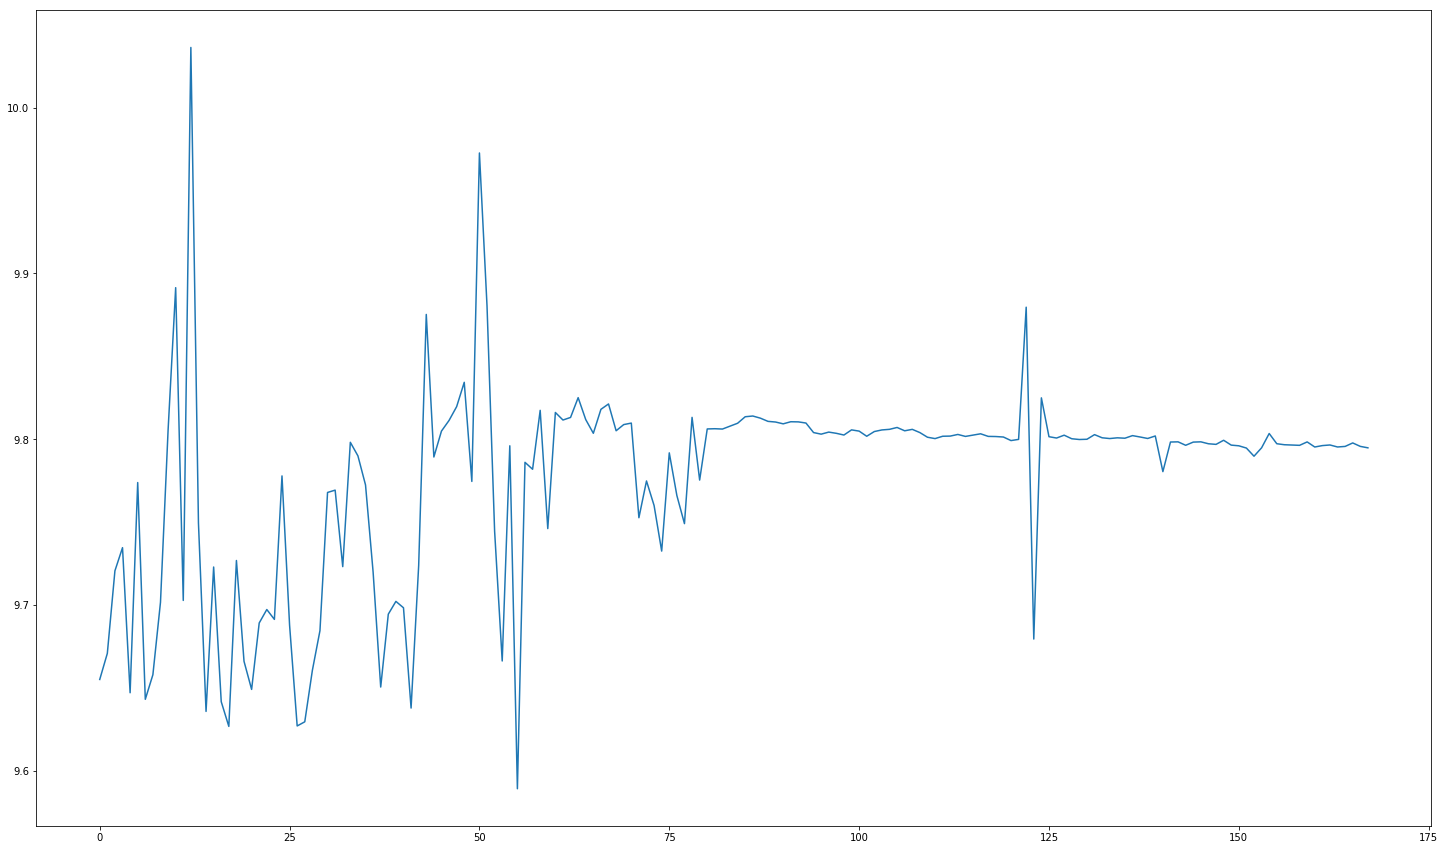

In [8]:
plt.rcParams['figure.figsize'] = [25, 15]
test = [ elem for elem in avg if elem != [10]]
print(len(test))
#print(test)
#plt.plot(a,test)
#plt.show()
su = list(range(0, len(test)))
print(len(su))
plt.plot(su,test)
plt.show()

In [21]:
for i in range(50,75):
    print(avg[i])
count = 0    
for i in range(len(avg)):
    if(avg[i] > 9.75 and avg[i] < 9.82):
        count+=1
    else:
        count = 0
    if(count == 6):
        print(i-5)
        
#(i-5)th window is when the user started to sleep
#k = k.tolist()
print(type(k))
for i in range(len(k)):
    #k[i] = k[i].tolist()
    print(type(k[i]))
    
print(type(k[0]))
print(k[2][0])

total_count = []
for i in range(len(k)):
    co = 0
    for j in range(len(k[i])):
        if(k[i][0][j] < 9.75 and k[i][0][j] > 9.82 ):
            co+=1
total_count.append(co)
print(total_count)
        

#predicting wake time is very difficult as there may be a single spike when user wakes up and keeps device in charge and keep it like that
#need to consider alarm times,charging stauts of device to predict awake time

[9.97261744]
[9.88035682]
[9.74460465]
[9.66636805]
[9.79609181]
[9.58935391]
[9.78611768]
[9.78195656]
[9.81746727]
[9.7461849]
[9.81617259]
[9.81162551]
[9.81318608]
[9.82511067]
[9.81188261]
[9.80363136]
[9.81808029]
[9.82130904]
[9.80515768]
[9.80887331]
[9.80977836]
[9.75272971]
[9.77489235]
[9.76008236]
[9.73261705]
68
78
125
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class

In [98]:
def forward(V, a, b, initial_distribution):
    alpha = np.zeros((V.shape[0], a.shape[0]))
    alpha[0, :] = initial_distribution * b[:, V[0]]

    for t in range(1, V.shape[0]):
        for j in range(a.shape[0]):
            # Matrix Computation Steps
            alpha[t, j] = alpha[t - 1].dot(a[:, j]) * b[j, V[t]]

    return alpha

In [99]:
def backward(V, a, b):
    beta = np.zeros((V.shape[0], a.shape[0]))

    # setting beta(T) = 1
    beta[V.shape[0] - 1] = np.ones((a.shape[0]))

    # Loop in backward way from T-1 to
    # Due to python indexing the actual loop will be T-2 to 0
    for t in range(V.shape[0] - 2, -1, -1):
        for j in range(a.shape[0]):
            beta[t, j] = (beta[t + 1] * b[:, V[t + 1]]).dot(a[j, :])

    return beta


In [100]:
def baum_welch(V, a, b, initial_distribution, n_iter=100):
    M = a.shape[0]
    T = len(V)

    for n in range(n_iter):
        alpha = forward(V, a, b, initial_distribution)
        beta = backward(V, a, b)

        xi = np.zeros((M, M, T - 1))
        for t in range(T - 1):
            denominator = np.dot(np.dot(alpha[t, :].T, a) * b[:, V[t + 1]].T, beta[t + 1, :])
            for i in range(M):
                numerator = alpha[t, i] * a[i, :] * b[:, V[t + 1]].T * beta[t + 1, :].T
                xi[i, :, t] = numerator / denominator

        gamma = np.sum(xi, axis=1)
        a = np.sum(xi, 2) / np.sum(gamma, axis=1).reshape((-1, 1))

        # Add additional T'th element in gamma
        gamma = np.hstack((gamma, np.sum(xi[:, :, T - 2], axis=0).reshape((-1, 1))))

        K = b.shape[1]
        denominator = np.sum(gamma, axis=1)
        for l in range(K):
            b[:, l] = np.sum(gamma[:, V == l], axis=1)

        b = np.divide(b, denominator.reshape((-1, 1)))

    return (a, b)

In [115]:
def viterbi(V, a, b, initial_distribution):
    T = V.shape[0]
    M = a.shape[0]

    omega = np.zeros((T, M))
    omega[0, :] = np.log(initial_distribution * b[:, V[0]])

    prev = np.zeros((T - 1, M))

    for t in range(1, T):
        for j in range(M):
            # Same as Forward Probability
            probability = omega[t - 1] + np.log(a[:, j]) + np.log(b[j, V[t]])

            # This is our most probable state given previous state at time t (1)
            prev[t - 1, j] = np.argmax(probability)

            # This is the probability of the most probable state (2)
            omega[t, j] = np.max(probability)

    # Path Array
    S = np.zeros(T)

    # Find the most probable last hidden state
    last_state = np.argmax(omega[T - 1, :])

    S[0] = last_state

    backtrack_index = 1
    for i in range(T - 2, -1, -1):
        S[backtrack_index] = prev[i, int(last_state)]
        last_state = prev[i, int(last_state)]
        backtrack_index += 1

    # Flip the path array since we were backtracking
    S = np.flip(S, axis=0)

    # Convert numeric values to actual hidden states
    result = []
    for s in S:
        if s == 0:
            result.append("awake")
        else:
            result.append("sleep")

    return result

In [164]:

#data = pd.read_csv('example.csv')

V = pred[0]

# Transition Probabilities
#a =  np.array([[0.5620,0.4380],[0.8431,0.1569]])
a=np.array([[0.5,0.5],[0.5,0.5]])
#print(a)

# Emission Probabilities
b = np.array(((1, 3), (2, 4)))
b = b / np.sum(b, axis=1).reshape((-1, 1))
#print(b)

# Equal Probabilities for the initial distribution
initial_distribution = np.array((0.2, 0.8))

a, b = baum_welch(V, a, b, initial_distribution, n_iter=101)
check = viterbi(np.asarray(pred[1]), a, b, initial_distribution)
print(viterbi(V, a, b, initial_distribution))

['sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'awake', 'awake', 'awake', 'awake', 'awake', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'awake', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep']


In [165]:
#pred[0] = np.asarray(pred[0])
check = np.asarray(check)

In [166]:
rt =0
for i in range(len(pred[1])):
    if(state[1][i] == check[i]):
        rt+=1
print(rt)        

81


In [167]:
print(state[1])
print(check)


['sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep']
['awake' 'sleep' 'sleep' 'sleep' 'sleep' 'sleep' 'sleep' 'sleep' 'sleep'
 'sleep' 'sleep' 'sleep' 'sleep' 'sleep' 'sleep' 'sleep' 'sleep' 'sleep'
 'sleep' 'sleep' 'sleep' 'sleep' 'sleep' 'sleep' 'sleep' 'sleep' 'sleep'
 'sleep' 'sleep' 'sleep' 'sleep' 

In [212]:
x = avg[68:] # our service start from 8:00 so,we'll consider data from 1:43 (from keshavsleepdata.csv)
y = readings[0] # csv file starts from 1:43
states = state[0]
reg = LinearRegression().fit(x, y)
#we're not getting a good score to map our data with the sleep as android data

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
